In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = np.loadtxt(open("Assignment5-similarities.csv", "rb"), delimiter=",", skiprows=1)


# Question 1:

Three ways one could convert a similarity to a distance are:
1. dist = 1- similarity -- reasoning being that if similarity is a proportion 0<x<1 then 1-similarity would represent the difference between two stimulus and the greater this number, the farther apart they should be in our visualization

2. dist = abs(1-similarity) -- in combination with the logic above, this could be a reasonable choice if similarities come from a range of both positive and negative values.

3. distance = sqrt(1-similarity**2) -- this would also be a reasonable choice because it will standardize a similarities dataset that has negative values so that it will be easier to interpret. 

For the purpose of this assignment, I will use option #1 because all the similarity scores are between 0 and 1 and this choice's simplicity will aid interpretability. 

In [3]:
#using my chosen distance calculation method
distance_positions = np.array([[1-s for s in sim] for sim in dataset])



# Question 2: 

In [4]:
def distance(x,y):
    # distance formula
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

In [5]:
def stress(matrix):
    #input is a given matrix of 2D vectors, output is the stress
    stress_total = 0
    for i in range(len(matrix)):
        pos_1 = matrix[i]
        for j in range(len(matrix)):
            if i!=j:
                pos_2 = matrix[j]
                actual_dist = distance_positions[i][j]
                stress1 = (actual_dist - distance(pos_1,pos_2))**2
                stress_total += stress1
    return stress_total

# Question 3:


In [6]:
def delta_add(p, i, j, delta):
    vector = np.array(p)
    vector[i,j] += delta
    return vector

In [7]:
delta=0.001
#chosen delta, to compute the derivative

def single_gradient(p, i, j, delta=0.001):
    #computes the gradient for a vector at position i,j in matrix p
    #derivative calculation: f'(x) = (f(x+delta)-f(x-delta))/(2*delta) 
    
    der = (stress(delta_add(p, i, j, delta)) - stress(delta_add(p, i, j, -delta)))/(2*delta)
    return der

In [8]:
def grad_matrix(matrix):
    #applies gradient descent alg to entire matrix using our single_gradient function 
    
    gradient_matrix = []
    
    for i in range(len(matrix)):
        gradient_matrix.append([single_gradient(matrix, i, 0), single_gradient(matrix, i, 1)])
        
    return np.asarray(gradient_matrix)

# Question 4:

Text(0, 0.5, 'y position')

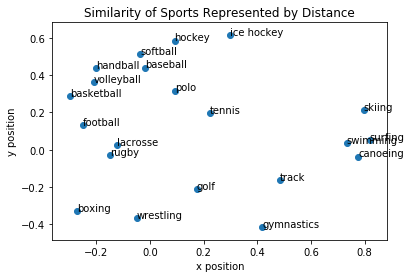

In [9]:
#set inital random positions for each entry in the dataset matrix
# size is set to the number of objects in our dataset and their dimension (2)

ann_names = ['football', 'baseball', 'basketball', 'tennis', 'softball', 'canoeing', 'handball', 'rugby', 'hockey',\
            'ice hockey', 'swimming', 'track', 'boxing', 'volleyball', 'lacrosse', 'skiing',\
            'golf', 'polo', 'surfing', 'wrestling', 'gymnastics']

dimension = 2
num_items = distance_positions.shape[0] 
#distance_positions defined in question 1 using chosen method

random_pos = np.random.normal(0, 1.0, size=(num_items, dimension))

initial_stress = stress(random_pos)

for i in range(100):
    random_pos = random_pos - 0.01*grad_matrix(random_pos)
    #uses gradient descent algorithm to update random position to be closer to minimum
    #learning rate chosen as 0.01

plt.scatter(random_pos.T[0], random_pos.T[1])


for a,b in enumerate(ann_names):
    plt.annotate(b, (random_pos.T[0][a], random_pos.T[1][a]))

plt.title('Similarity of Sports Represented by Distance')
plt.xlabel('x position')
plt.ylabel('y position')

This plot agrees with my intuition because it created positional clusters of water sports, wrestling/boxing, and sports that involve balls are all positioned in the same general region of the graph which seems to be a reasonable result and aligns with my expectations of what sports should be grouped nearby eachother. 

# Question 5:

Text(0, 0.5, "People's Reported Distances")

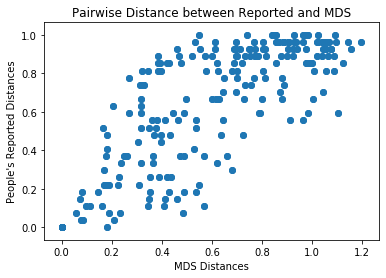

In [10]:
x_values=[]
y_values = []
for i in range(len(distance_positions)):
    for j in range(len(distance_positions)):
        x = distance(random_pos[i], random_pos[j])
        y=distance_positions[i,j]
        x_values+=[x]
        y_values+=[y]

plt.scatter(x_values, y_values)
plt.title('Pairwise Distance between Reported and MDS')
plt.xlabel('MDS Distances')
plt.ylabel("People's Reported Distances")

I would say that this plot looks good because it seems to have a positive linear trend, indicating a positive relationship between the reported distances and the distances that MDS found. This positive correlation indicates that as the reported Similarity distances go up (ie. the items being considered are increasingly different), the MDS distances increase accurately representing this increase in difference between items.

# Question 6:

Text(0, 0.5, 'Cumulative Stress')

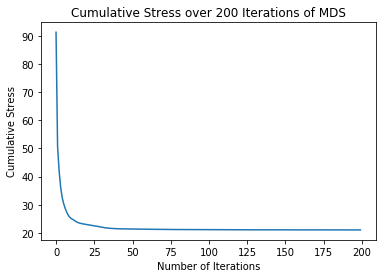

In [13]:
random_pos = np.random.normal(0, 1, size=(num_items, dimension))

initial_stress = stress(random_pos)

stress_tracker = []

for i in range(200):
    random_pos = random_pos - 0.01*grad_matrix(random_pos)
    new = stress(random_pos)
    stress_tracker += [new]



plt.plot(np.arange(0,200,1), stress_tracker)
plt.title('Cumulative Stress over 200 Iterations of MDS')
plt.xlabel('Number of Iterations')
plt.ylabel('Cumulative Stress')

We could use this plot to figure out how many iterations of MDS are needed because at around 100 trials there does not seem to be any more major change in stress. This indicates MDS was able to converge and minimize the difference between psychological distance (difference bw sports) and MDS's calculation of this difference.

# Question 7:

10 MDS Simulations
Best Trial Number: 5 with Cumulative Stress: 17.548974352203704


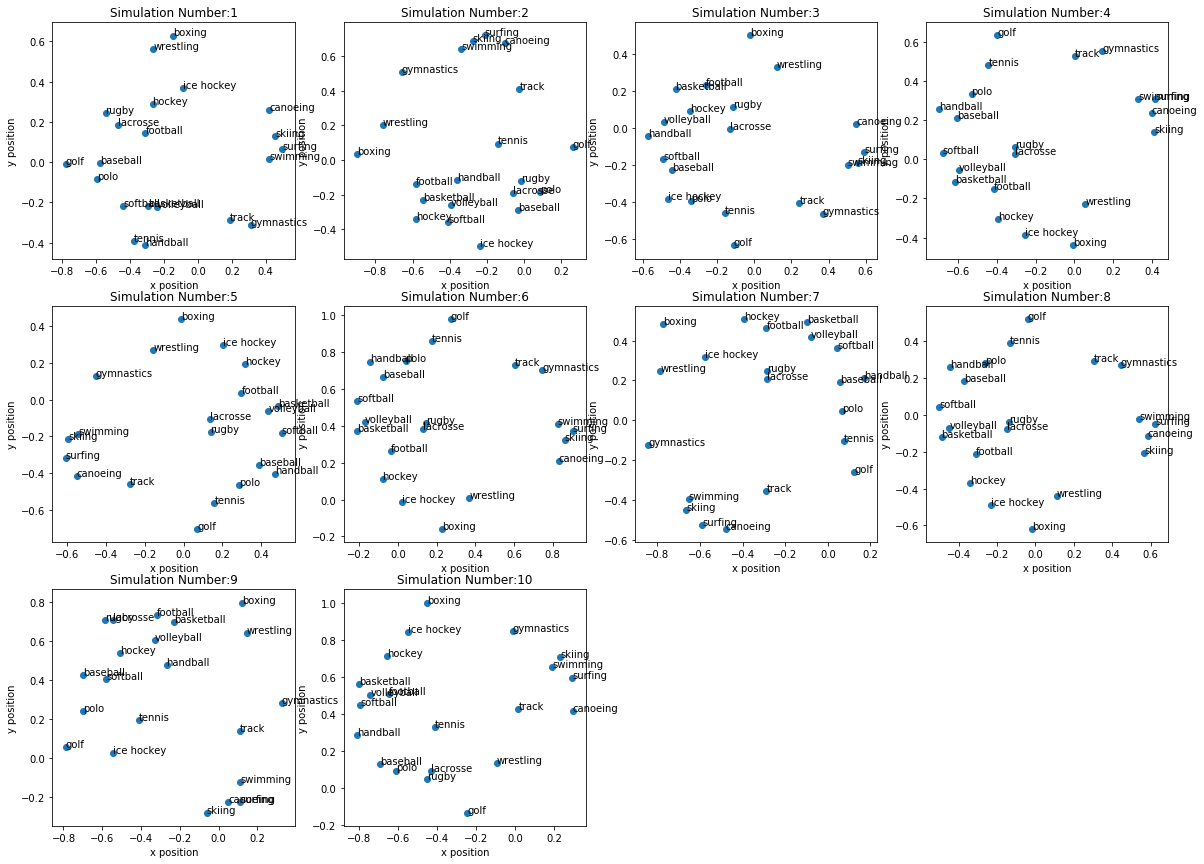

In [15]:
def trial():
    random_pos = np.random.normal(0, 1.0, size=(num_items, dimension))
    for i in range(100):
        random_pos = random_pos - 0.01*grad_matrix(random_pos)
        #uses gradient descent algorithm to update random position to be closer to minimum
        #learning rate chosen as 0.01
    return random_pos


fig = plt.figure(figsize=(20,20))


min_stress=10000
trial_num = 10000
for i in range(1,11):
    sp = fig.add_subplot(4,4,i)
    random_pos=trial()
    cum_stress = stress(random_pos)
    if cum_stress<min_stress:
        min_stress = cum_stress
        trial_num = i
        best_plot_xs = random_pos.T[0] 
        best_plot_ys = random_pos.T[1]
    plt.scatter(random_pos.T[0], random_pos.T[1])
    plt.title('Simulation Number:'+str(i))
    plt.xlabel('x position')
    plt.ylabel('y position')
    for a,b in enumerate(ann_names):
        plt.annotate(b, (random_pos.T[0][a], random_pos.T[1][a]))

print('10 MDS Simulations')
print('Best Trial Number:', trial_num, 'with Cumulative Stress:', min_stress)


These plots are not all the same because they are starting from different inital positions , randomly chosen on each iteration of the simulation. The gradient descent algorithm will then do its best to update the positions to minimize the difference between reported difference and the distances depicted on the plot. However, with a set 100 iterations of updating the positions the gradient descent will make step sizes as long as the learning rate in the direction determined by the gradient. This process will not look the same every time because it is heavily dependent on the initial starting position and is limited to 100 trials to get as close as possible to the local minima; so, it will not have the same results every time. 

# Question 8:

To pick the best outcome of my MDS trials given random initial starting positions, I kept tracker variables to determine the trial with the lowest cumulative stress. This would be the best answer because it has the smallest overall difference from the reported psychological similarities, indicating that it was MDS's best outcome. 

Best Trial Number: 5 with Cumulative Stress: 17.548974352203704


Text(0, 0.5, 'y position')

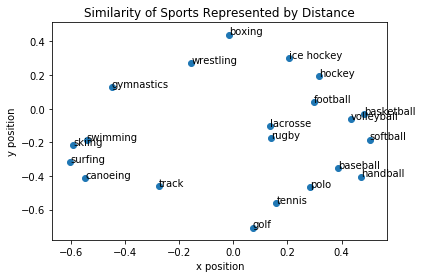

In [16]:
print('Best Trial Number:', trial_num, 'with Cumulative Stress:', min_stress)
plt.scatter(best_plot_xs, best_plot_ys)
for a,b in enumerate(ann_names):
        plt.annotate(b, (best_plot_xs[a], best_plot_ys[a]))
        

plt.title('Similarity of Sports Represented by Distance')
plt.xlabel('x position')
plt.ylabel('y position')